In [26]:
# TODO 
# IMPROVE SUBJECT DF CREATION !!!!
# REMOVE NON NEEDED VISUALISATIONS !!!!!!!

# ONLY 7 MUSCLES CLASSIFICATION WITHOUT R+L!!!!!

In [27]:
# Installation of BioSignalsNotebooks
# %pip install biosignalsnotebooks
# %pip install tqdm

In [28]:
# Imports
import os
import glob
import pickle
import numpy as np
import pandas as pd
from tabulate import tabulate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import biosignalsnotebooks as bsnb
# import plotly.graph_objects as go

# Tensorflow Model
import tensorflow as tf
from keras import Sequential
from keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ModelCheckpoint
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import InputLayer, Conv1D, LeakyReLU, MaxPooling1D, LSTM

# Model Metrics
import seaborn as sn
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

## Creating the sEMG Dataframes from the CSV files

In [29]:
# # Function to create a dataframe to store the data of every subject across all trials 
# def subject_df_creator(subject_id, muscles_of_interest):
#     trials_dfs_list = []
#     output_msg=[]
# 
#     for trial_number in tqdm(range(1, 51), desc=f"Concatenating trial Files for Subject AB{subject_id}"):
#         filename = f"5362627/AB{subject_id}/AB{subject_id}/Raw/AB{subject_id}_Circuit_0{trial_number:02d}_raw.csv"
#         if not os.path.exists(filename):  # Check if the file exists
#             output_msg.append(f"0{trial_number:02d}")
#             continue
# 
#         df_trial = pd.read_csv(filename)
#         df_trial_combined = pd.DataFrame()
# 
#         # Concatenate 'Right_' and 'Left_' values for each muscle of interest
#         for i in range(len(muscles_of_interest)):
#             df_trial_combined[muscles_of_interest[i]] = pd.concat([df_trial['Right_'+muscles_of_interest[i]], df_trial['Left_'+muscles_of_interest[i]]], ignore_index=True)
# 
#         trials_dfs_list.append(df_trial_combined)
# 
#     # Concatenate all DataFrames in the list along the rows axis
#     merged_df = pd.concat(trials_dfs_list, ignore_index=True)
#     if output_msg:
#         print(f"{len(output_msg)} Files do not exist:", output_msg)
#     return merged_df

In [30]:
# Defining important lists
subjects = ["156", "185", "186", "188", "189", "190", "191", "192", "193", "194"]
muscles = ['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF']

In [31]:
# # Creating dataframes to save subject-specific data
# df_subject_156 = subject_df_creator("156", muscles)
# df_subject_185 = subject_df_creator("185", muscles)
# df_subject_186 = subject_df_creator("186", muscles)
# df_subject_188 = subject_df_creator("188", muscles)
# df_subject_189 = subject_df_creator("189", muscles)
# df_subject_190 = subject_df_creator("190", muscles)
# df_subject_191 = subject_df_creator("191", muscles)
# df_subject_192 = subject_df_creator("192", muscles)
# df_subject_193 = subject_df_creator("193", muscles)
# df_subject_194 = subject_df_creator("194", muscles)
# # # IMPROVE !!!!!!!!!!!!!!!!!!!!!!

In [32]:
# # Saving the Dataframes into pickle objects to save time
# df_subject_156.to_pickle('pickled_dataframes/df_subject_156.pkl')
# df_subject_185.to_pickle('pickled_dataframes/df_subject_185.pkl')
# df_subject_186.to_pickle('pickled_dataframes/df_subject_186.pkl')
# df_subject_188.to_pickle('pickled_dataframes/df_subject_188.pkl')
# df_subject_189.to_pickle('pickled_dataframes/df_subject_189.pkl')
# df_subject_190.to_pickle('pickled_dataframes/df_subject_190.pkl')
# df_subject_191.to_pickle('pickled_dataframes/df_subject_191.pkl')
# df_subject_192.to_pickle('pickled_dataframes/df_subject_192.pkl')
# df_subject_193.to_pickle('pickled_dataframes/df_subject_193.pkl')
# df_subject_194.to_pickle('pickled_dataframes/df_subject_194.pkl')

In [33]:
# Load pickle files into DataFrames
df_subject_156 = pd.read_pickle('pickled_dataframes/df_subject_156.pkl')
df_subject_185 = pd.read_pickle('pickled_dataframes/df_subject_185.pkl')
df_subject_186 = pd.read_pickle('pickled_dataframes/df_subject_186.pkl')
df_subject_188 = pd.read_pickle('pickled_dataframes/df_subject_188.pkl')
df_subject_189 = pd.read_pickle('pickled_dataframes/df_subject_189.pkl')
df_subject_190 = pd.read_pickle('pickled_dataframes/df_subject_190.pkl')
df_subject_191 = pd.read_pickle('pickled_dataframes/df_subject_191.pkl')
df_subject_192 = pd.read_pickle('pickled_dataframes/df_subject_192.pkl')
df_subject_193 = pd.read_pickle('pickled_dataframes/df_subject_193.pkl')
df_subject_194 = pd.read_pickle('pickled_dataframes/df_subject_194.pkl')

In [34]:
# Merging all the subject dataframes into one
list_of_all_subjects_dfs = [df_subject_156, df_subject_185, df_subject_186, df_subject_188, df_subject_189,
                            df_subject_190, df_subject_191, df_subject_192, df_subject_193, df_subject_194]

df_all_subjects = pd.concat(list_of_all_subjects_dfs, ignore_index=True)

In [35]:
df_all_subjects

,TA,MG,SOL,BF,ST,VL,RF
0,-0.110857,-0.078660,-0.077287,-0.073320,-0.107652,-0.075303,-0.069352
1,-0.094835,-0.069810,-0.068132,-0.071031,-0.103227,-0.072251,-0.062943
2,-0.083238,-0.055314,-0.057298,-0.064775,-0.096361,-0.067063,-0.055772
3,-0.076219,-0.051194,-0.052110,-0.059281,-0.091478,-0.066148,-0.049821
4,-0.071336,-0.048295,-0.049363,-0.058976,-0.093614,-0.064622,-0.049668
...,...,...,...,...,...,...,...
23351875,-0.089799,-0.063249,-0.095598,-0.070573,-0.103685,-0.042039,-0.072404
23351876,-0.094224,-0.061875,-0.082628,-0.072709,-0.088273,-0.052720,-0.062028
23351877,-0.093767,-0.059892,-0.076371,-0.072709,-0.078202,-0.051804,-0.055924
23351878,-0.096666,-0.061112,-0.072251,-0.075151,-0.070878,-0.055009,-0.052567


## EMG Visualisation 

In [36]:
# # adding figures and traces
# fig1 = go.Figure()
# fig1.add_trace(go.Scatter(x=df_all_subjects.index/1000, y=df_all_subjects['TA'][60000:90000]))
# fig1.update_layout( title="sEMG Signal: Sitting Vs Contraction Bursts Vs Rest", xaxis_title="Time (s)",
#                     yaxis_title="sEMG Activity (V)", margin=dict(l=50, r=50, b=50, t=50, pad=4),
#                     autosize=False, width=800, height=301)
# # plotting
# fig1.show()

## EMG Analysis

In [37]:
# Studying mean, sigma and variance of the 2 Muscles
df_analysis = pd.DataFrame()
df_analysis['Mean'] = df_all_subjects.mean()
df_analysis['Std'] = df_all_subjects.std()
df_analysis['Var'] = df_all_subjects.var()
df_analysis

,Mean,Std,Var
TA,-0.095527,0.053082,0.002818
MG,-0.067019,0.046308,0.002144
SOL,-0.078862,0.053928,0.002908
BF,-0.074807,0.034799,0.001211
ST,-0.092018,0.027390,0.000750
VL,-0.063718,0.041050,0.001685
RF,-0.064333,0.021242,0.000451


## Burst Detection

In [38]:
# # Saving the detected bursts for every muscle 
# sr = 1000 # sample rate = 1000Hz
# sl = 20 # smooth level (Size of sliding window used during the moving average process) #used to be 40
# th = 10 # threshold (To cover activation)
# 
# # Initializing lists
# detected_bursts_TA = [] ; detected_bursts_MG = [] ; detected_bursts_SOL= []
# detected_bursts_BF = [] ; detected_bursts_ST = [] ; detected_bursts_VL = []
# detected_bursts_RF = []
# 
# pbar = tqdm(total=len(muscles)*len(list_of_all_subjects_dfs), desc="All Subjects Burst Detection Progress", unit= "Muscle")
# for df_subject in list_of_all_subjects_dfs:
#     ## TA
#     detected_bursts_TA.append(bsnb.detect_emg_activations(emg_signal=df_subject['TA'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)  # Update progress bar
#     ## MG
#     detected_bursts_MG.append(bsnb.detect_emg_activations(emg_signal=df_subject['MG'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)
#     ## SOL
#     detected_bursts_SOL.append(bsnb.detect_emg_activations(emg_signal=df_subject['SOL'], sample_rate=sr, smooth_level=sl,
#                                                            threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)
#     ## BF
#     detected_bursts_BF.append(bsnb.detect_emg_activations(emg_signal=df_subject['BF'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)
#     ## ST
#     detected_bursts_ST.append(bsnb.detect_emg_activations(emg_signal=df_subject['ST'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)
#     ## VL
#     detected_bursts_VL.append(bsnb.detect_emg_activations(emg_signal=df_subject['VL'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)
#     ## RF
#     detected_bursts_RF.append(bsnb.detect_emg_activations(emg_signal=df_subject['RF'], sample_rate=sr, smooth_level=sl,
#                                                           threshold_level=th, time_units=True, device='CH0', plot_result= False))
#     pbar.update(1)

In [39]:
# # Creating the pickles to save the burst detection results (saves 29 minutes)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_TA.pkl', 'wb') as f: pickle.dump(detected_bursts_TA, f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_MG.pkl', 'wb') as f: pickle.dump(detected_bursts_MG, f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_SOL.pkl','wb') as f: pickle.dump(detected_bursts_SOL,f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_BF.pkl', 'wb') as f: pickle.dump(detected_bursts_BF, f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_ST.pkl', 'wb') as f: pickle.dump(detected_bursts_ST, f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_VL.pkl', 'wb') as f: pickle.dump(detected_bursts_VL, f)
# with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_RF.pkl', 'wb') as f: pickle.dump(detected_bursts_RF, f)

In [40]:
# Loading the pickles
pbar = tqdm(total=len(muscles), desc="Burst Detection Loading Progress", unit= "Muscle")
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_TA.pkl', 'rb') as f: detected_bursts_TA = pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_MG.pkl', 'rb') as f: detected_bursts_MG = pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_SOL.pkl','rb') as f: detected_bursts_SOL= pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_BF.pkl', 'rb') as f: detected_bursts_BF = pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_ST.pkl', 'rb') as f: detected_bursts_ST = pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_VL.pkl', 'rb') as f: detected_bursts_VL = pickle.load(f)
pbar.update(1)
with open('pickled_detected_bursts/7_muscles_all_subjects_detected_bursts_RF.pkl', 'rb') as f: detected_bursts_RF = pickle.load(f)
pbar.update(1)

Burst Detection Loading Progress:   0%|          | 0/7 [00:00<?, ?Muscle/s]

True

In [41]:
# pd.DataFrame(detected_bursts_SOL[:][:10]).transpose()

## Detected Bursts Visualisation

In [42]:
# # Visualising the EMG Burst Detection for SOL
# plot_duration = 40000 # time in milliseconds
# bsnb.detect_emg_activations(emg_signal = df_all_subjects['SOL'][:plot_duration], sample_rate = sr, smooth_level=sl, threshold_level=th, time_units=True, device='CH0', plot_result= True)
# print('')

In [43]:
# # Visualizing First Activations -> SEE CAPTURED WINDOW WITH RESPECT OF IDENTIFIED ACTIVATION
# duration = 8000
# shift = 2000
# number_bursts_to_plot = 1
# 
# plt.rcParams["figure.figsize"] = (10,5)
# fig = plt.figure()
# 
# plt.plot(df_all_subjects['TA'][:duration], color="cornflowerblue")
# for i in range(number_bursts_to_plot): # Plot first N bursts
#     plt.axvline(detected_bursts_TA[0][i]*1000,color='red', label="Detected Burst Region") # ONSET VERTICAL LINE
#     plt.axvline(detected_bursts_TA[1][i]*1000,color='red') # OFFSET VERTICAL LINE
#     plt.axvline(detected_bursts_TA[0][i]*1000+400,color='black', label="Onset Window (300ms)") # ONSET VERTICAL LINE CORRECTED (START WINDOW)
#     plt.axvline(detected_bursts_TA[0][i]*1000-100,color='black') # VERTICAL LINE (END WINDOW)
#     
# plt.legend(loc="upper left")
# plt.xlim(shift,duration)
# plt.grid()
# plt.xlabel('Time (ms)', fontsize=10)
# plt.ylabel('sEMG Intensity (V)', fontsize=10)
# 
# # plt.savefig("Window.png")

In [44]:
# # adding figures and traces
# fig1 = go.Figure()
# fig1.add_trace(go.Scatter(x = df_all_subjects.index/1000 , y=df_all_subjects['Left_TA'][:10000]))
# 
# # formatting the plot
# fig1.update_layout(autosize=True, title="sEMG Signal: Detected burst and corrected onset window",
#                    xaxis_title="Time (s)", yaxis_title="sEMG Activity (V)", margin=dict(l=50, r=50, b=50, t=50, pad=4))
# 
# fig1.add_vrect(x0=detected_bursts_TA[0][0], x1=detected_bursts_left_TA[1][0], row="all", col=1,
#                annotation_text="Detected Burst", annotation_position="top right", fillcolor="gray",
#                opacity=0.25, line_width=0)
# 
# fig1.add_vline(x=detected_bursts_left_TA[0][0]+0.4,line_width=1.5, line_dash="dot", line_color="red")
# fig1.add_vline(x=detected_bursts_left_TA[0][0]-0.1,line_width=1.5, line_dash="dot", line_color="red",
#                annotation_text="Onset Window",annotation_position="bottom right")
# 
# # fig1.update_xaxes(range=[7.5, 20000/1000])
# # fig1.update_yaxes(range=[-2, 2])
# fig1.update_layout(autosize=False, width=800, height=301)
# # plotting
# fig1.show()

In [45]:
# # adding figures and traces
# fig1 = go.Figure()
# fig1.add_trace(go.Scatter(x= df_all_subjects.index/1000, y=df_all_subjects['TA']))
# # formatting the plot
# fig1.update_layout(autosize=True, title="sEMG Signal: Detection of Activation Bursts",
#                    xaxis_title="Time (s)", yaxis_title="sEMG Activity (V)",
#                    margin=dict(l=50, r=50, b=50, t=50, pad=4))
# 
# for i in range(len(detected_bursts_TA[0])):
#     fig1.add_vrect(x0=detected_bursts_TA[0][i], x1=detected_bursts_TA[1][i], row="all", col=1,
#                    annotation_text="Detected Burst", annotation_position="top right",
#                    fillcolor="black", opacity=0.25, line_width=0)
# 
# # fig1.update_xaxes(range=[30, 60])
# fig1.update_layout(autosize=False, width=800, height=301)
# # plotting
# fig1.show()

## Detected Bursts Analysis 

### Number of Detected Bursts

In [46]:
# Defining Variables to store the total number of bursts for every muscle 
tot_bursts_TA = []; tot_bursts_MG = []; tot_bursts_SOL= []; tot_bursts_BF = []
tot_bursts_ST = []; tot_bursts_VL = []; tot_bursts_RF = []
burst_count_list_for_printing = []

# Calculating the total number of bursts per muscle
for subject_idx, subject in enumerate(subjects):
    tot_bursts_TA.append(len(detected_bursts_TA[subject_idx][0]))
    tot_bursts_MG.append(len(detected_bursts_MG[subject_idx][0]))
    tot_bursts_SOL.append(len(detected_bursts_SOL[subject_idx][0]))
    tot_bursts_BF.append(len(detected_bursts_BF[subject_idx][0]))
    tot_bursts_ST.append(len(detected_bursts_ST[subject_idx][0]))
    tot_bursts_VL.append(len(detected_bursts_VL[subject_idx][0]))
    tot_bursts_RF.append(len(detected_bursts_RF[subject_idx][0]))
    # Saving the results in a list for fancy printing
    burst_count_list_for_printing.append([subject, tot_bursts_TA[subject_idx], tot_bursts_MG[subject_idx], tot_bursts_SOL[subject_idx],
                                          tot_bursts_BF[subject_idx], tot_bursts_ST[subject_idx], tot_bursts_VL[subject_idx],
                                          tot_bursts_RF[subject_idx]])

# Adding the total row to the printing
burst_count_list_for_printing.append([])
burst_count_list_for_printing.append(['---'])
burst_count_list_for_printing.append(['Total Sum', sum(tot_bursts_TA), sum(tot_bursts_MG), sum(tot_bursts_SOL), sum(tot_bursts_BF), sum(tot_bursts_ST), sum(tot_bursts_VL), sum(tot_bursts_RF)])

# Printing the table
print("Number of Muscle Bursts Per Subject Per Muscle:\n")
headers = ["Subject", "TA Bursts", "MG Bursts", "SOL Bursts", "BF Bursts", "ST Bursts", "VL Bursts", "RF Bursts"]
print(tabulate(burst_count_list_for_printing, headers=headers))

Number of Muscle Bursts Per Subject Per Muscle:

Subject      TA Bursts    MG Bursts    SOL Bursts    BF Bursts    ST Bursts    VL Bursts    RF Bursts
---------  -----------  -----------  ------------  -----------  -----------  -----------  -----------
156                452          760           296          815           40          214          156
185                399          948           832          742          736         1132         1117
186                398          729           695          554          739          650          475
188                 16           31           166           15            5           84            3
189                719          973          1001          301          953          799          469
190                450          851           737          477          878          432          761
191                205          915           500          555          694          733          111
192                100          6

### Longest Detected Bursts

In [47]:
# Lists to store longest burst per muscle for all subjects
longest_bursts_TA = []; longest_bursts_MG = []; longest_bursts_SOL= []
longest_bursts_BF = []; longest_bursts_ST = []; longest_bursts_VL = []
longest_bursts_RF = []
longest_burst_list_for_printing = []

# Calculating the longest burst per muscle
for subject_idx, subject in enumerate(subjects):
    longest_bursts_TA.append(max(np.array(detected_bursts_TA[subject_idx][1])-np.array(detected_bursts_TA[subject_idx][0])))
    longest_bursts_MG.append(max(np.array(detected_bursts_MG[subject_idx][1])-np.array(detected_bursts_MG[subject_idx][0])))
    longest_bursts_SOL.append(max(np.array(detected_bursts_SOL[subject_idx][1])-np.array(detected_bursts_SOL[subject_idx][0])))
    longest_bursts_BF.append(max(np.array(detected_bursts_BF[subject_idx][1])-np.array(detected_bursts_BF[subject_idx][0])))
    longest_bursts_ST.append(max(np.array(detected_bursts_ST[subject_idx][1])-np.array(detected_bursts_ST[subject_idx][0])))
    longest_bursts_VL.append(max(np.array(detected_bursts_VL[subject_idx][1])-np.array(detected_bursts_VL[subject_idx][0])))
    longest_bursts_RF.append(max(np.array(detected_bursts_RF[subject_idx][1])-np.array(detected_bursts_RF[subject_idx][0])))
    # Saving the results in a list for printing
    longest_burst_list_for_printing.append([subject, longest_bursts_TA[subject_idx],longest_bursts_MG[subject_idx],
                                            longest_bursts_SOL[subject_idx],longest_bursts_BF[subject_idx],
                                            longest_bursts_ST[subject_idx],longest_bursts_VL[subject_idx],
                                            longest_bursts_RF[subject_idx]])

# Adding the total row to the printing
longest_burst_list_for_printing.append([])
longest_burst_list_for_printing.append(['---'])
longest_burst_list_for_printing.append(['Longest Burst', max(longest_bursts_TA), max(longest_bursts_MG),
                                        max(longest_bursts_SOL), max(longest_bursts_BF),
                                        max(longest_bursts_ST), max(longest_bursts_VL),
                                        max(longest_bursts_RF)])

# Printing the table
print("Longest Burst Per Subject Per Muscle:\n")
headers = ["Subject", "TA (s)", "MG (s)", "SOL (s)", "BF (s)", "ST (s)", "VL (s)", "RF (s)"]
print(tabulate(longest_burst_list_for_printing, headers=headers))

Longest Burst Per Subject Per Muscle:

Subject          TA (s)    MG (s)    SOL (s)    BF (s)    ST (s)    VL (s)    RF (s)
-------------  --------  --------  ---------  --------  --------  --------  --------
156               2.439     2.515      1.666     6.978     1.549     1.3       1.136
185               2.144     1.145      2.081     1.206     2.13      6.104     7.858
186               3.562     1.2        6.879     1.339     1.393     2.755    14.415
188               0.498     0.484      0.487     2.926     0.482     0.728     0.484
189               1.935     1.033      1.054     1.635     1.401     1.337     8.304
190               2.8       1.049      8.063    27.161    15.564     0.868    23.222
191               1.386     1.741     12.86      2.449     3.614    16.882     1.026
192               1.32      0.857      6.178    42.035     1.495    42.095   350.68
193               1.811     0.487      0.761     0.754     2.673     1.18      0.747
194               1.326    

### Average Detected Bursts Lengths

In [48]:
# Lists to store average burst length per muscle for all subjects
average_burst_lengths_TA = [] ; average_burst_lengths_MG = [] ; average_burst_lengths_SOL= []
average_burst_lengths_BF = [] ; average_burst_lengths_ST = [] ; average_burst_lengths_VL = []
average_burst_lengths_RF = []
avg_burst_len_list_for_printing = []


# Calculating average burst length per muscle
for subject_idx, subject in enumerate(subjects):
    average_burst_lengths_TA.append(np.mean(np.array(detected_bursts_TA[subject_idx][1])-np.array(detected_bursts_TA[subject_idx][0])))
    average_burst_lengths_MG.append(np.mean(np.array(detected_bursts_MG[subject_idx][1])-np.array(detected_bursts_MG[subject_idx][0])))
    average_burst_lengths_SOL.append(np.mean(np.array(detected_bursts_SOL[subject_idx][1])-np.array(detected_bursts_SOL[subject_idx][0])))
    average_burst_lengths_BF.append(np.mean(np.array(detected_bursts_BF[subject_idx][1])-np.array(detected_bursts_BF[subject_idx][0])))
    average_burst_lengths_ST.append(np.mean(np.array(detected_bursts_ST[subject_idx][1])-np.array(detected_bursts_ST[subject_idx][0])))
    average_burst_lengths_VL.append(np.mean(np.array(detected_bursts_VL[subject_idx][1])-np.array(detected_bursts_VL[subject_idx][0])))
    average_burst_lengths_RF.append(np.mean(np.array(detected_bursts_RF[subject_idx][1])-np.array(detected_bursts_RF[subject_idx][0])))
    # Saving the results in a list for fancy printing
    avg_burst_len_list_for_printing.append([subject,
                                            round(np.mean(average_burst_lengths_TA[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_MG[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_SOL[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_BF[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_ST[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_VL[subject_idx]), 3),
                                            round(np.mean(average_burst_lengths_RF[subject_idx]), 3)])

# Adding the total row to the printing
avg_burst_len_list_for_printing.append([])
avg_burst_len_list_for_printing.append(['---'])
avg_burst_len_list_for_printing.append(['Avg. Len', round(np.mean(average_burst_lengths_TA), 3), round(np.mean(average_burst_lengths_MG), 3),
                                        round(np.mean(average_burst_lengths_SOL), 3), round(np.mean(average_burst_lengths_BF), 3),
                                        round(np.mean(average_burst_lengths_ST), 3), round(np.mean(average_burst_lengths_VL), 3),
                                        round(np.mean(average_burst_lengths_RF), 3)])

# Printing the table
print("Average Burst Length Per Subject Per Muscle:\n")
headers = ["Subject", "TA Avg.Len (s)", "MG Avg.Len (s)", "SOL Avg.Len (s)", "BF Avg.Len (s)", "ST Avg.Len (s)", "VL Avg.Len (s)", "RF Avg.Len (s)"]
print(tabulate(avg_burst_len_list_for_printing, headers=headers))

Average Burst Length Per Subject Per Muscle:

Subject      TA Avg.Len (s)    MG Avg.Len (s)    SOL Avg.Len (s)    BF Avg.Len (s)    ST Avg.Len (s)    VL Avg.Len (s)    RF Avg.Len (s)
---------  ----------------  ----------------  -----------------  ----------------  ----------------  ----------------  ----------------
156                   0.461             0.474              0.381             0.662             0.279             0.515             0.438
185                   0.469             0.459              0.499             0.439             0.423             0.678             0.668
186                   0.369             0.44               0.62              0.433             0.378             0.496             1.797
188                   0.249             0.24               0.346             0.673             0.401             0.283             0.48
189                   0.474             0.459              0.443             0.378             0.411             0.522             0.

### Histogram: Detected Bursts Lengths

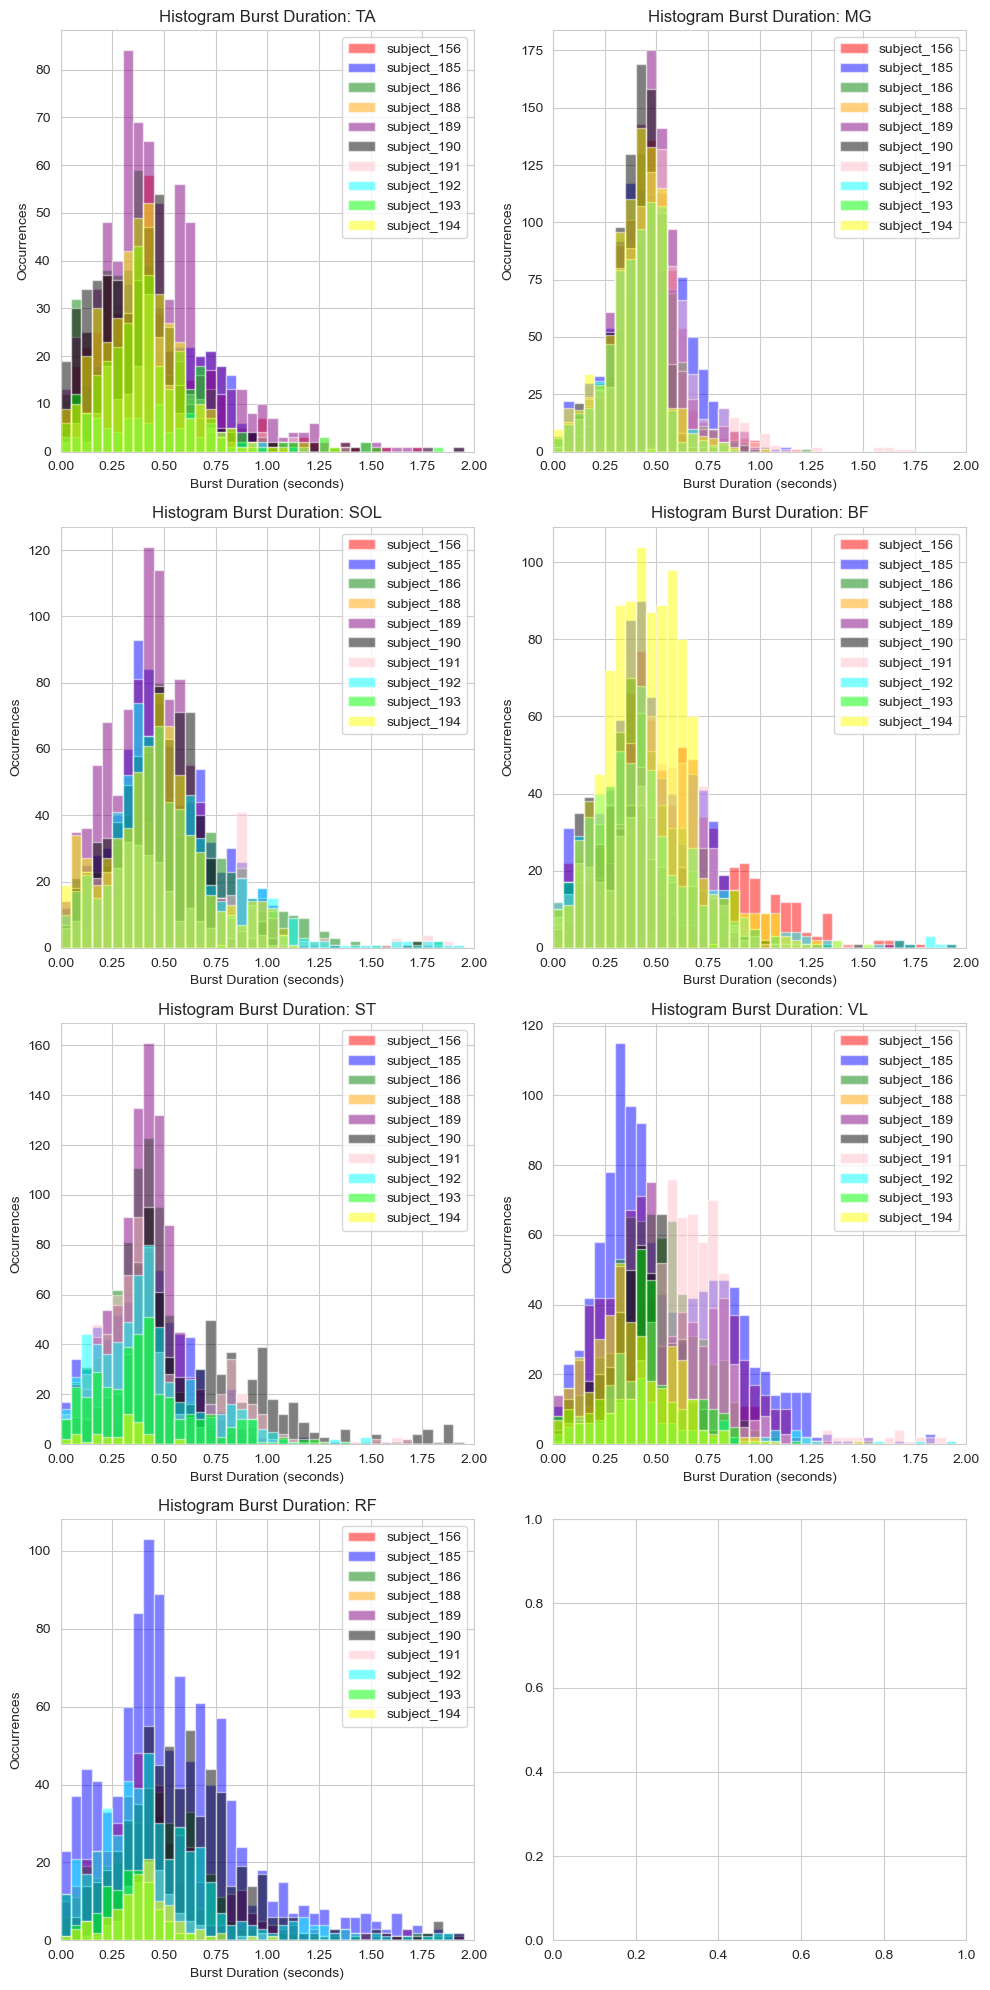

In [49]:
# Adjust subplot indexing
f, a = plt.subplots(4, 2)
f.set_size_inches(10, 20)
a = a.ravel()
bin_edges = np.arange(start=0, stop=2, step=0.05)  # Example for bins of width 0.05


colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'pink', 'cyan', 'lime', 'yellow']

for subject_idx, subject in enumerate(subjects):
    subject = "subject_" + subject
    a[0].hist(np.array(detected_bursts_TA[subject_idx][1])-np.array(detected_bursts_TA[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[1].hist(np.array(detected_bursts_MG[subject_idx][1])-np.array(detected_bursts_MG[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[2].hist(np.array(detected_bursts_SOL[subject_idx][1])-np.array(detected_bursts_SOL[subject_idx][0]),bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[3].hist(np.array(detected_bursts_BF[subject_idx][1])-np.array(detected_bursts_BF[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[4].hist(np.array(detected_bursts_ST[subject_idx][1])-np.array(detected_bursts_ST[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[5].hist(np.array(detected_bursts_VL[subject_idx][1])-np.array(detected_bursts_VL[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])
    a[6].hist(np.array(detected_bursts_RF[subject_idx][1])-np.array(detected_bursts_RF[subject_idx][0]), bins=bin_edges, alpha=0.5, label=subject, color=colors[subject_idx])

# Set legends, titles, and labels for each subplot
for muscle_idx, muscle in enumerate(muscles):
    a[muscle_idx].legend(loc='upper right')
    a[muscle_idx].set_title('Histogram Burst Duration: ' + muscle)
    a[muscle_idx].set_xlabel("Burst Duration (seconds)")
    a[muscle_idx].set_ylabel("Occurrences")
    a[muscle_idx].set_xlim([0, 2])  # Remove to see how bad the burst detection is 

plt.tight_layout()
plt.show()

## Leave one out: Separating a Subject

In [51]:
leave_one_out = 2 # Specify which one to leave out (from 0 to 9)

In [52]:
# Saving the LOO Bursts
loo_detected_bursts_TA = [detected_bursts_TA.pop(leave_one_out)]
loo_detected_bursts_MG = [detected_bursts_MG.pop(leave_one_out)]
loo_detected_bursts_SOL= [detected_bursts_SOL.pop(leave_one_out)]
loo_detected_bursts_BF = [detected_bursts_BF.pop(leave_one_out)]
loo_detected_bursts_ST = [detected_bursts_ST.pop(leave_one_out)]
loo_detected_bursts_VL = [detected_bursts_VL.pop(leave_one_out)]
loo_detected_bursts_RF = [detected_bursts_RF.pop(leave_one_out)]

In [53]:
# Saving the LOO EMG signal
loo_emg_signal_TA  = list(list_of_all_subjects_dfs[leave_one_out]['TA'])
loo_emg_signal_MG  = list(list_of_all_subjects_dfs[leave_one_out]['MG'])
loo_emg_signal_SOL = list(list_of_all_subjects_dfs[leave_one_out]['SOL'])
loo_emg_signal_BF  = list(list_of_all_subjects_dfs[leave_one_out]['BF'])
loo_emg_signal_ST  = list(list_of_all_subjects_dfs[leave_one_out]['ST'])
loo_emg_signal_VL  = list(list_of_all_subjects_dfs[leave_one_out]['VL'])
loo_emg_signal_RF  = list(list_of_all_subjects_dfs[leave_one_out]['RF'])

In [54]:
# Removing the LOO from the training
del subjects[leave_one_out]
del list_of_all_subjects_dfs[leave_one_out]
df_all_subjects = pd.concat(list_of_all_subjects_dfs, ignore_index=True)

In [55]:
# Verifying the LOO process
print(f"Subject AB{subjects[leave_one_out]} was excluded from the training!\n"
      f"{len(list_of_all_subjects_dfs)} subjects remaining for training!")

Subject AB186 was excluded from the training!
9 subjects remaining for training!


# Extracting Bursts

### Method: Preserving Onset and Window = 300ms

In [56]:
def extract_burst_windows(muscle_emg_signal, onset_list, window_size, left_shift_value, muscle_name):
    sampling_rate = 1000
    all_subjects_burst_samples = []
    for subject_index in tqdm(range(len(onset_list)), desc=f"Extracting Bursts for {muscle_name}"):
        current_subject_bursts = []
        ii = -1
        for onset in onset_list[subject_index][0]:
            ii += 1
            onset_ms = int(onset * sampling_rate) - left_shift_value
            current_sample_window = []
            if onset != onset_list[subject_index][0][-1]:
                if (onset_ms + window_size) < (onset_list[subject_index][0][ii + 1] * 1000):
                    for time_step in range(window_size):
                        current_sample_window.append(muscle_emg_signal[onset_ms + time_step])
            else:
                for time_step in range(window_size):
                    current_sample_window.append(muscle_emg_signal[onset_ms + time_step])

            if current_sample_window:
                current_sample_window -= np.mean(current_sample_window)
                current_subject_bursts.append(current_sample_window)
        all_subjects_burst_samples.append(current_subject_bursts)
    return all_subjects_burst_samples

In [57]:
window = 300 # in ms (total window size)
left_shift = 100 # in ms (left shift from detected onset). See detected onset on the vertical red lines in the plots above

fixed_bursts_TA = extract_burst_windows(df_all_subjects['TA'], detected_bursts_TA, window, left_shift, 'TA')
fixed_bursts_MG = extract_burst_windows(df_all_subjects['MG'], detected_bursts_MG, window, left_shift, 'MG')
fixed_bursts_SOL= extract_burst_windows(df_all_subjects['SOL'],detected_bursts_SOL,window, left_shift, 'SOL')
fixed_bursts_BF = extract_burst_windows(df_all_subjects['BF'], detected_bursts_BF, window, left_shift, 'BF')
fixed_bursts_ST = extract_burst_windows(df_all_subjects['ST'], detected_bursts_ST, window, left_shift, 'ST')
fixed_bursts_VL = extract_burst_windows(df_all_subjects['VL'], detected_bursts_VL, window, left_shift, 'VL')
fixed_bursts_RF = extract_burst_windows(df_all_subjects['RF'], detected_bursts_RF, window, left_shift, 'RF')

Extracting Bursts for TA:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for MG:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for SOL:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for BF:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for ST:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for VL:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Bursts for RF:   0%|          | 0/9 [00:00<?, ?it/s]

In [113]:
# Defining Variables to store the total number of bursts for every muscle 
tot_bursts_TA = []; tot_bursts_MG = []; tot_bursts_SOL= []; tot_bursts_BF = []
tot_bursts_ST = []; tot_bursts_VL = []; tot_bursts_RF = []
burst_count_list_for_printing = []

# Calculating the total number of bursts per muscle
for subject_idx, subject in enumerate(subjects):
    tot_bursts_TA.append(len(fixed_bursts_TA[subject_idx]))
    tot_bursts_MG.append(len(fixed_bursts_MG[subject_idx]))
    tot_bursts_SOL.append(len(fixed_bursts_SOL[subject_idx]))
    tot_bursts_BF.append(len(fixed_bursts_BF[subject_idx]))
    tot_bursts_ST.append(len(fixed_bursts_ST[subject_idx]))
    tot_bursts_VL.append(len(fixed_bursts_VL[subject_idx]))
    tot_bursts_RF.append(len(fixed_bursts_RF[subject_idx]))
    # Saving the results in a list for fancy printing
    burst_count_list_for_printing.append([subject, tot_bursts_TA[subject_idx], tot_bursts_MG[subject_idx], tot_bursts_SOL[subject_idx],
                                          tot_bursts_BF[subject_idx], tot_bursts_ST[subject_idx], tot_bursts_VL[subject_idx],
                                          tot_bursts_RF[subject_idx]])

# Adding the total row to the printing
burst_count_list_for_printing.append([])
burst_count_list_for_printing.append(['---'])
burst_count_list_for_printing.append(['Total Sum', sum(tot_bursts_TA), sum(tot_bursts_MG), sum(tot_bursts_SOL), sum(tot_bursts_BF), sum(tot_bursts_ST), sum(tot_bursts_VL), sum(tot_bursts_RF)])

# Printing the table
print("Number of Muscle Bursts Per Subject Per Muscle:\n")
headers = ["Subject", "TA Bursts", "MG Bursts", "SOL Bursts", "BF Bursts", "ST Bursts", "VL Bursts", "RF Bursts"]
print(tabulate(burst_count_list_for_printing, headers=headers))

Number of Muscle Bursts Per Subject Per Muscle:

Subject      TA Bursts    MG Bursts    SOL Bursts    BF Bursts    ST Bursts    VL Bursts    RF Bursts
---------  -----------  -----------  ------------  -----------  -----------  -----------  -----------
156                449          760           296          813           40          214          156
185                399          946           824          736          730         1125         1100
188                 16           31           166           15            5           84            3
189                713          973           998          300          946          790          466
190                445          851           737          474          871          430          756
191                205          914           499          552          690          732          111
192                100          652           730          632          605          229          508
193                306           

In [74]:
# Extracting the LOO 300-fixed bursts
loo_fixed_bursts_TA = extract_burst_windows(loo_emg_signal_TA, loo_detected_bursts_TA, window, left_shift, 'Leave one Out: TA')[0]
loo_fixed_bursts_MG = extract_burst_windows(loo_emg_signal_MG, loo_detected_bursts_MG, window, left_shift, 'Leave one Out: MG')[0]
loo_fixed_bursts_SOL= extract_burst_windows(loo_emg_signal_SOL,loo_detected_bursts_SOL,window, left_shift, 'Leave one Out: SOL')[0]
loo_fixed_bursts_BF = extract_burst_windows(loo_emg_signal_BF, loo_detected_bursts_BF, window, left_shift, 'Leave one Out: BF')[0]
loo_fixed_bursts_ST = extract_burst_windows(loo_emg_signal_ST, loo_detected_bursts_ST, window, left_shift, 'Leave one Out: ST')[0]
loo_fixed_bursts_VL = extract_burst_windows(loo_emg_signal_VL, loo_detected_bursts_VL, window, left_shift, 'Leave one Out: VL')[0]
loo_fixed_bursts_RF = extract_burst_windows(loo_emg_signal_RF, loo_detected_bursts_RF, window, left_shift, 'Leave one Out: RF')[0]

Extracting Bursts for Leave one Out: TA:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: MG:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: SOL:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: BF:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: ST:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: VL:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting Bursts for Leave one Out: RF:   0%|          | 0/1 [00:00<?, ?it/s]

In [128]:
loo_burst_count_list_for_printing = [["Leave-One-Out", len(loo_fixed_bursts_TA), len(loo_fixed_bursts_MG), len(loo_fixed_bursts_SOL), len(loo_fixed_bursts_BF), len(loo_fixed_bursts_ST), len(loo_fixed_bursts_VL), len(loo_fixed_bursts_RF)]]

# Printing the table
print("Number of Muscle Bursts of the Leave-One-Out Subject:\n")
headers = ["Subject", "TA", "MG", "SOL", "BF", "ST", "VL", "RF"]
print(tabulate(loo_burst_count_list_for_printing, headers=headers))

Number of Muscle Bursts of the Leave-One-Out Subject:

Subject          TA    MG    SOL    BF    ST    VL    RF
-------------  ----  ----  -----  ----  ----  ----  ----
Leave-One-Out   395   727    690   552   736   644   472


## Saving Leave One Out as TFRecord

In [76]:
loo_emg_series_complete = [loo_fixed_bursts_TA, loo_fixed_bursts_MG, loo_fixed_bursts_SOL,
                           loo_fixed_bursts_BF, loo_fixed_bursts_ST, loo_fixed_bursts_VL,
                           loo_fixed_bursts_RF]

muscle_groups = len(loo_emg_series_complete)

with tf.io.TFRecordWriter('tfrecords/leave_one_out.tfrecord') as tfrecord:
    for emg_muscle in tqdm(range(muscle_groups), desc="Extracting dataset to TFRecords"):
        for sample in loo_emg_series_complete[emg_muscle]:
            # Prepare the features for TFRecord
            features = {
                'label': tf.train.Feature(float_list=tf.train.FloatList(value=tf.keras.utils.to_categorical(emg_muscle, 7))),
                'feature': tf.train.Feature(float_list=tf.train.FloatList(value=sample))
            }
            example = tf.train.Example(features=tf.train.Features(feature=features))
            tfrecord.write(example.SerializeToString())

Extracting dataset to TFRecords:   0%|          | 0/7 [00:00<?, ?it/s]

In [77]:
# Iterate over the whole dataset to count records/samples (https://www.rustyrobotics.com/posts/tensorflow/tfdataset-record-count/)
# Reference: https://www.rustyrobotics.com/posts/tensorflow/tfdataset-record-count/
def countRecords(ds:tf.data.Dataset):
    count = 0
    if tf.executing_eagerly():
        # TF v2 or v1 in eager mode
        for _ in ds:
            count = count+1
    else:
        # TF v1 in non-eager mode
        iterator = tf.compat.v1.data.make_one_shot_iterator(ds)
        next_batch = iterator.get_next()
        with tf.compat.v1.Session() as sess:
            try:
                while True:
                    sess.run(next_batch)
                    count = count+1
            except tf.errors.OutOfRangeError:
                pass
    return count

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 1024

In [78]:
def loo_read_tfrecord(serialized_example):
    tfrecord_format = (
        {
            'label': tf.io.FixedLenFeature([7], tf.float32),  # MUSCLE LABEL: Adjusted for one-hot encoded labels
            'feature': tf.io.FixedLenFeature([window], tf.float32),  # sEMG VALUE: Adjusted for features
        }
    )
    example = tf.io.parse_single_example(serialized_example, tfrecord_format)
    f = tf.reshape(example['feature'], [window, 1])  # Reshape if needed, here it's kept for consistency
    f.set_shape([window, 1])
    return f, example['label']

def loo_get_dataset(tf_record_name):
    dataset = tf.data.TFRecordDataset(tf_record_name)
    dataset = dataset.map(loo_read_tfrecord, num_parallel_calls=AUTOTUNE)
    dataset_samples = countRecords(dataset)
    dataset = dataset.shuffle(dataset_samples)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

In [ ]:
loo_dataset = loo_get_dataset('tfrecords/leave_one_out.tfrecord')

In [79]:
for feature, label in loo_dataset:
    print(f'label={label.shape}, feature={feature.shape}')

label=(1024, 7), feature=(1024, 300, 1)
label=(1024, 7), feature=(1024, 300, 1)
label=(1024, 7), feature=(1024, 300, 1)
label=(1024, 7), feature=(1024, 300, 1)
label=(120, 7), feature=(120, 300, 1)


# TFRecords: Storing Training and Validation Datasets in Tensorflow Records

Reference: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/tfrecord.ipynb#scrollTo=_e3g9ExathXP

## Write TFRecords

In [80]:
def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def extract_burst_windows_tfrecord(emg_series_complete, onset_lists, window_size, left_shift_value):
    # Ensure unique file names for parallel processing or repeated calls
    file_name = 'tfrecords/all_dataset.tfrecord'
    with tf.io.TFRecordWriter(file_name) as tfrecord:
        for muscle_index in tqdm(range(len(emg_series_complete)), desc="Extracting dataset to TFRecords (Fixed Window)"):
            for subject_index in range(len(onset_lists[muscle_index])):
                burst_count = 0
                ii = -1
                for onset in onset_lists[muscle_index][subject_index][0]:
                    ii += 1
                    onset_ms = int(onset * 1000) - left_shift_value
                    current_sample_window = []
                    if onset != onset_lists[muscle_index][subject_index][0][-1]:
                        if (onset_ms + window_size) < (onset_lists[muscle_index][subject_index][0][ii + 1] * 1000):
                            burst_count = burst_count + 1
                            for time_step in range(window_size):
                                current_sample_window.append(emg_series_complete[muscle_index][onset_ms + time_step])
                    else:
                        burst_count = burst_count + 1
                        for time_step in range(window_size):
                            current_sample_window.append(emg_series_complete[muscle_index][onset_ms + time_step])

                    if current_sample_window:
                        current_sample_window -= np.mean(current_sample_window)
                        # Convert your sample and label to appropriate tf.train.Feature formats
                        features = {
                            'label': _int64_feature(muscle_index),
                            'feature': tf.train.Feature(float_list=tf.train.FloatList(value=current_sample_window)),
                            'subject': _int64_feature(subject_index + 1),
                            'burst': _int64_feature(burst_count)
                        }
                        example = tf.train.Example(features=tf.train.Features(feature=features))
                        tfrecord.write(example.SerializeToString())
    return file_name

In [81]:
# # .....
# emg_series_tot = [df_all_subjects['TA'], df_all_subjects['MG'], df_all_subjects['SOL'],
#                   df_all_subjects['BF'], df_all_subjects['ST'], df_all_subjects['VL'],
#                   df_all_subjects['RF']]
# 
# detected_bursts_tot = [detected_bursts_TA, detected_bursts_MG, detected_bursts_SOL,
#                        detected_bursts_BF, detected_bursts_ST, detected_bursts_VL,
#                        detected_bursts_RF]
# # Extracting bursts
# extract_burst_windows_tfrecord(emg_series_tot, detected_bursts_tot,  window, left_shift)

Extracting dataset to TFRecords (Fixed Window):   0%|          | 0/7 [00:00<?, ?it/s]

'tfrecords/all_dataset.tfrecord'

## Read TFRecords

In [82]:
def map_fn(serialized_example):
    features = {
        'label': tf.io.FixedLenFeature([], tf.int64),
        'feature': tf.io.FixedLenFeature([window], tf.float32),
        'subject': tf.io.FixedLenFeature([], tf.int64),
        'burst':  tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(serialized_example, features)
    return example['label'], example['feature'], example['subject'], example['burst']

In [83]:
dataset = tf.data.TFRecordDataset('tfrecords/all_dataset.tfrecord')
dataset = dataset.map(map_fn)

for label, feature, subject, burst in dataset.take(10):
    print(f'label={label}, Number of features={len(feature)}  subject={subject}, burst={burst}')

label=0, Number of features=300  subject=1, burst=1
label=0, Number of features=300  subject=1, burst=2
label=0, Number of features=300  subject=1, burst=3
label=0, Number of features=300  subject=1, burst=4
label=0, Number of features=300  subject=1, burst=5
label=0, Number of features=300  subject=1, burst=6
label=0, Number of features=300  subject=1, burst=7
label=0, Number of features=300  subject=1, burst=8
label=0, Number of features=300  subject=1, burst=9
label=0, Number of features=300  subject=1, burst=10


In [84]:
def separate_dataset_per_subject_train_val(dataset, subj, train_percentage):
    # Filtering whole dataset TFRECORDS by subjects:
    dataset_subject = dataset.filter(lambda label,feature,subject,burst: subject==subj)
    # Count Total Samples for each Subject Dataset
    dataset_subject_samples = countRecords(dataset_subject)
    # Shuffling bursts per subject
    dataset_subject_shuffled = dataset_subject.shuffle(dataset_subject_samples)
    # Separating Subject Training and Evaluation Datasets:
    dataset_subject_1_train = dataset_subject_shuffled.take(int(dataset_subject_samples*train_percentage))
    dataset_subject_1_val = dataset_subject_shuffled.skip(int(dataset_subject_samples*train_percentage)).take(dataset_subject_samples - int(dataset_subject_samples*train_percentage))
    return dataset_subject_1_train, dataset_subject_1_val

In [85]:
# Training/Validation Split
train_percentage = 0.8
dataset_subject1_train, dataset_subject1_val = separate_dataset_per_subject_train_val(dataset, 1, train_percentage)
dataset_subject2_train, dataset_subject2_val = separate_dataset_per_subject_train_val(dataset, 2, train_percentage)
dataset_subject3_train, dataset_subject3_val = separate_dataset_per_subject_train_val(dataset, 3, train_percentage)
dataset_subject4_train, dataset_subject4_val = separate_dataset_per_subject_train_val(dataset, 4, train_percentage)
dataset_subject5_train, dataset_subject5_val = separate_dataset_per_subject_train_val(dataset, 5, train_percentage)
dataset_subject6_train, dataset_subject6_val = separate_dataset_per_subject_train_val(dataset, 6, train_percentage)
dataset_subject7_train, dataset_subject7_val = separate_dataset_per_subject_train_val(dataset, 7, train_percentage)
dataset_subject8_train, dataset_subject8_val = separate_dataset_per_subject_train_val(dataset, 8, train_percentage)
dataset_subject9_train, dataset_subject9_val = separate_dataset_per_subject_train_val(dataset, 9, train_percentage)

# print(countRecords(dataset_subject2_train))

for label, feature, subject, burst in dataset_subject1_train.take(10):
    print(f'label={label}, Number of features={len(feature)}  subject={subject}, burst={burst}')

label=4, Number of features=300  subject=1, burst=40
label=3, Number of features=300  subject=1, burst=367
label=5, Number of features=300  subject=1, burst=59
label=2, Number of features=300  subject=1, burst=196
label=1, Number of features=300  subject=1, burst=344
label=2, Number of features=300  subject=1, burst=83
label=3, Number of features=300  subject=1, burst=283
label=1, Number of features=300  subject=1, burst=53
label=3, Number of features=300  subject=1, burst=251
label=3, Number of features=300  subject=1, burst=295


In [ ]:
# ???????
all_subject_datasets_train = [dataset_subject1_train, dataset_subject2_train, dataset_subject3_train,
                              dataset_subject4_train, dataset_subject5_train, dataset_subject6_train,
                              dataset_subject7_train, dataset_subject8_train, dataset_subject9_train]

all_subject_datasets_val =   [dataset_subject1_val, dataset_subject2_val, dataset_subject3_val,
                              dataset_subject4_val, dataset_subject5_val, dataset_subject6_val,
                              dataset_subject7_val, dataset_subject8_val, dataset_subject9_val]

In [86]:
# ????
def augment_datasets(collection_datasets, tf_record_name):
    with tf.io.TFRecordWriter(tf_record_name) as tfrecord:
        for d in collection_datasets:
            for label, feature, subject, burst in d:
                features = {
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=np.asarray([label]))),
                    'feature': tf.train.Feature(float_list=tf.train.FloatList(value=np.asarray(feature))),
                    'subject': tf.train.Feature(int64_list=tf.train.Int64List(value=np.asarray([subject]))),
                    'burst': tf.train.Feature(int64_list=tf.train.Int64List(value=np.asarray([burst])))
                }
                example = tf.train.Example(features=tf.train.Features(feature=features))
                tfrecord.write(example.SerializeToString())
    return

def map_fn_final(serialized_example):
    features = {
        'label': tf.io.FixedLenFeature([], tf.int64),
        'feature': tf.io.FixedLenFeature([window], tf.float32),
        'subject': tf.io.FixedLenFeature([], tf.int64),
        'burst': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(serialized_example, features)
    return example['label'], example['feature'], example['subject'], example['burst']

def mix_and_shuffle_datasets(tf_record_name):
    dataset = tf.data.TFRecordDataset(tf_record_name)
    dataset = dataset.map(map_fn_final)
    dataset_samples = countRecords(dataset)
    dataset_final = dataset.shuffle(dataset_samples)
    return dataset_final

In [108]:
# ???????
augment_datasets(all_subject_datasets_train, 'tfrecords/all_mixed_train.tfrecord')
augment_datasets(all_subject_datasets_val, 'tfrecords/all_mixed_val.tfrecord')

dataset_final_train = mix_and_shuffle_datasets('tfrecords/all_mixed_train.tfrecord')
dataset_final_val = mix_and_shuffle_datasets('tfrecords/all_mixed_val.tfrecord')

In [109]:
for label, feature, subject, burst in dataset_final_train.take(20):
    print(f'label={label}, feature={len(feature)}, subject={subject}, burst={burst}')

label=4, feature=300, subject=7, burst=389
label=1, feature=300, subject=1, burst=241
label=5, feature=300, subject=6, burst=626
label=1, feature=300, subject=6, burst=763
label=1, feature=300, subject=2, burst=124
label=5, feature=300, subject=4, burst=547
label=3, feature=300, subject=1, burst=613
label=0, feature=300, subject=2, burst=268
label=0, feature=300, subject=1, burst=444
label=5, feature=300, subject=7, burst=20
label=2, feature=300, subject=5, burst=412
label=5, feature=300, subject=5, burst=51
label=4, feature=300, subject=2, burst=536
label=3, feature=300, subject=4, burst=239
label=6, feature=300, subject=6, burst=75
label=4, feature=300, subject=4, burst=410
label=2, feature=300, subject=2, burst=575
label=2, feature=300, subject=9, burst=72
label=2, feature=300, subject=2, burst=423
label=4, feature=300, subject=6, burst=528


## Load TFRecords

In [88]:
def read_tfrecord(serialized_example, export_subject=False):
    tfrecord_format = (
        {
            'label': tf.io.FixedLenFeature([], tf.int64),
            'feature': tf.io.FixedLenFeature([window], tf.float32),
            'subject': tf.io.FixedLenFeature([], tf.int64),
            'burst':  tf.io.FixedLenFeature([], tf.int64)
        }
    )
    example = tf.io.parse_single_example(serialized_example, tfrecord_format)
    f = tf.reshape(example['feature'], [window,1])
    f.set_shape([window, 1])
    # One-hot encode the label to match the expected shape for categorical_crossentropy
    label = tf.one_hot(example['label'], depth=7)
    if export_subject:
        return f, label, example['subject']
    return f, label

def get_dataset(tf_record_name):
    # dataset = load_dataset(filename)
    dataset = tf.data.TFRecordDataset(tf_record_name)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    dataset_samples = countRecords(dataset)
    print("Samples: ", dataset_samples)
    dataset = dataset.shuffle(dataset_samples)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

In [89]:
train_dataset = get_dataset('tfrecords/all_mixed_train.tfrecord')
valid_dataset = get_dataset('tfrecords/all_mixed_val.tfrecord')

Samples:  24224
Samples:  6060


## Verifying the shapes of: LOO, Training and Validation

In [90]:
for feature, label in loo_dataset:
    print(f'Loo: label={label.shape}, feature={feature.shape}')

Loo: label=(1024, 7), feature=(1024, 300, 1)
Loo: label=(1024, 7), feature=(1024, 300, 1)
Loo: label=(1024, 7), feature=(1024, 300, 1)
Loo: label=(1024, 7), feature=(1024, 300, 1)
Loo: label=(120, 7), feature=(120, 300, 1)


In [91]:
for feature, label in train_dataset:
    print(f'Train: label={label.shape}, feature={feature.shape}')

Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=(1024, 7), feature=(1024, 300, 1)
Train: label=

In [92]:
for feature, label in valid_dataset:
    print(f'Validation: label={label.shape}, feature={feature.shape}')

Validation: label=(1024, 7), feature=(1024, 300, 1)
Validation: label=(1024, 7), feature=(1024, 300, 1)
Validation: label=(1024, 7), feature=(1024, 300, 1)
Validation: label=(1024, 7), feature=(1024, 300, 1)
Validation: label=(1024, 7), feature=(1024, 300, 1)
Validation: label=(940, 7), feature=(940, 300, 1)


## Plotting Muscle Bursts

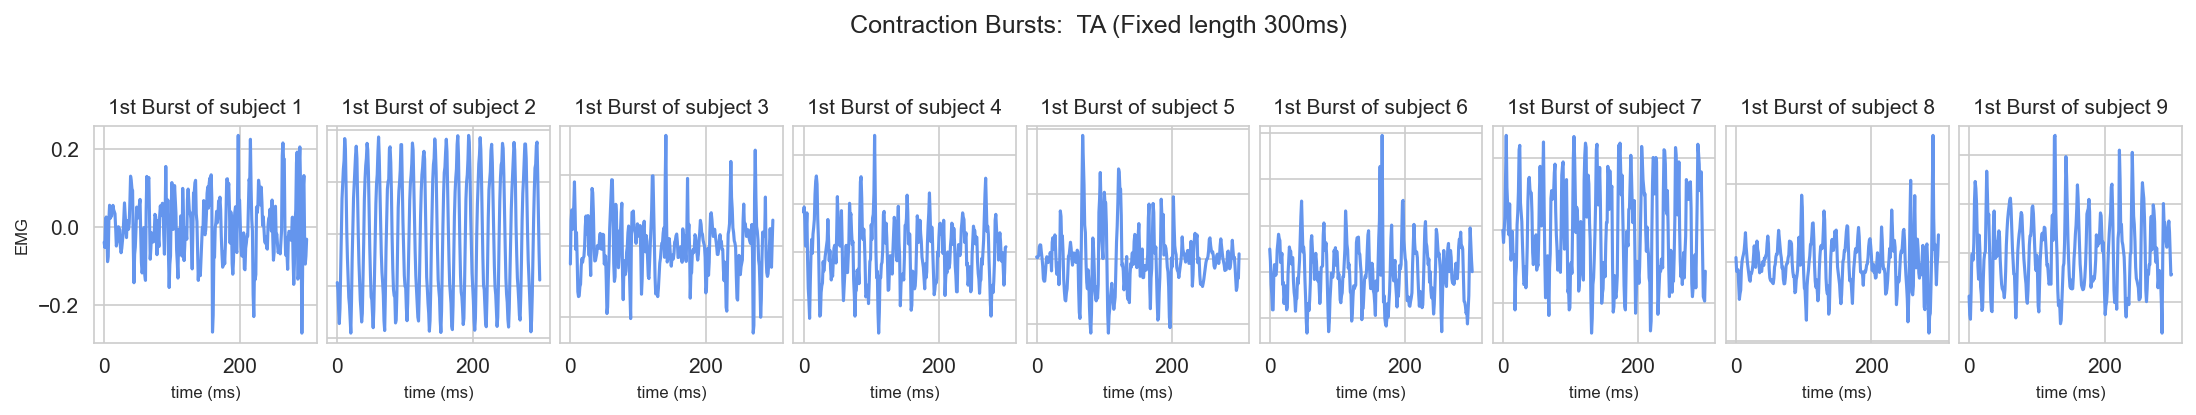

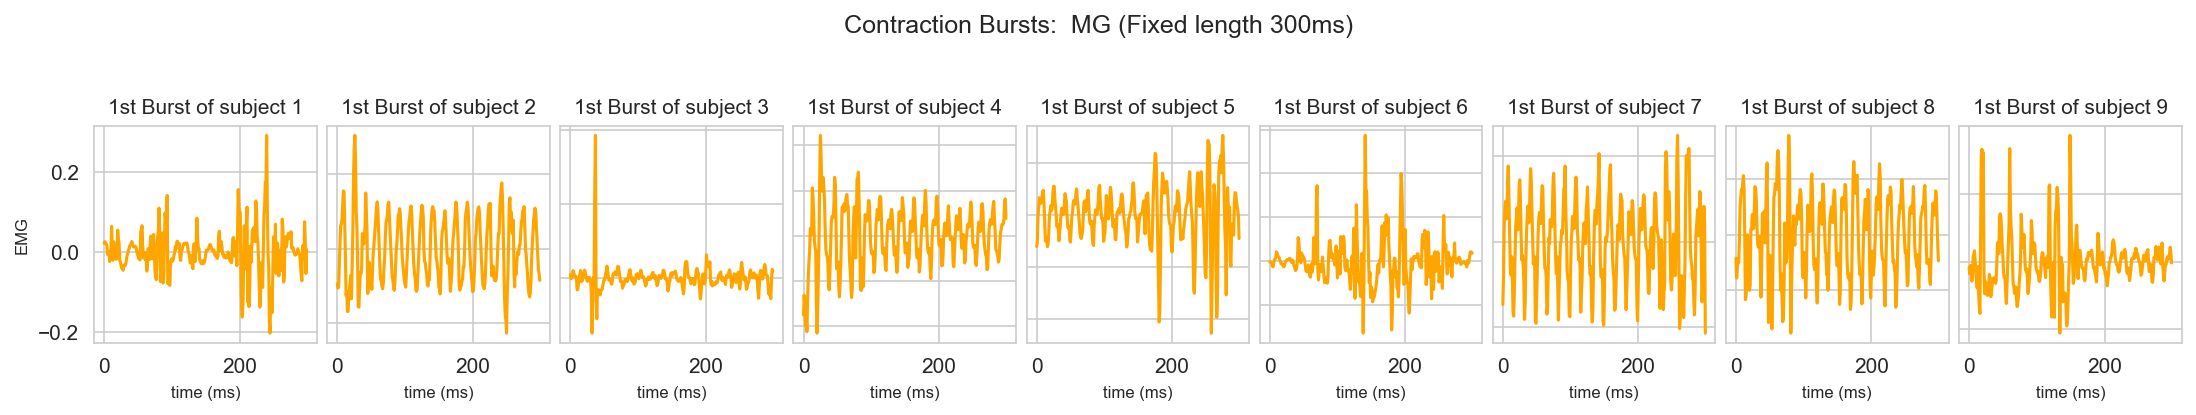

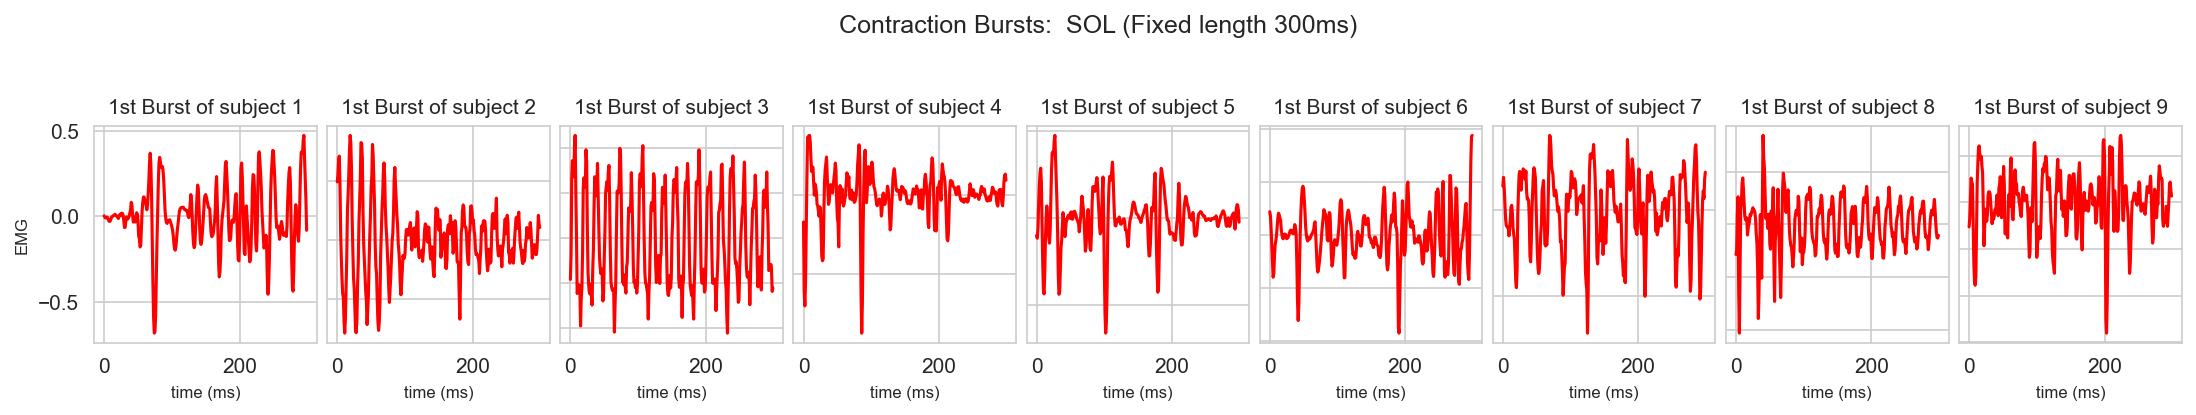

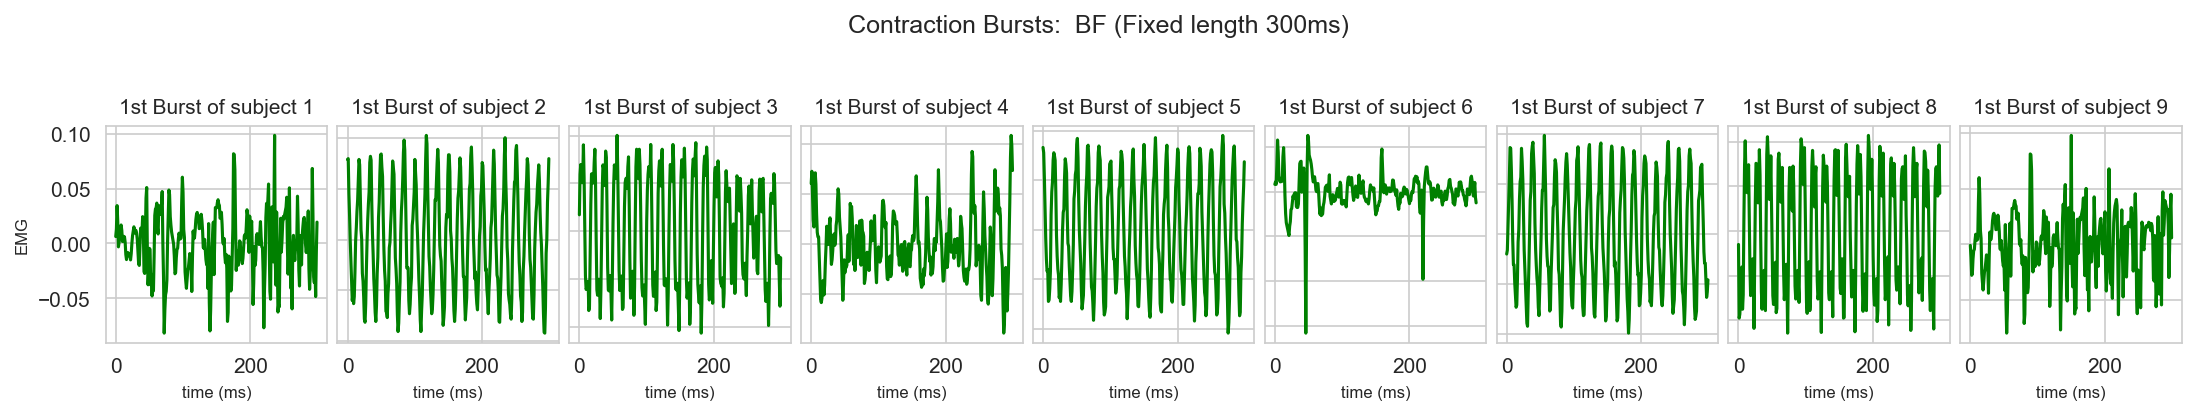

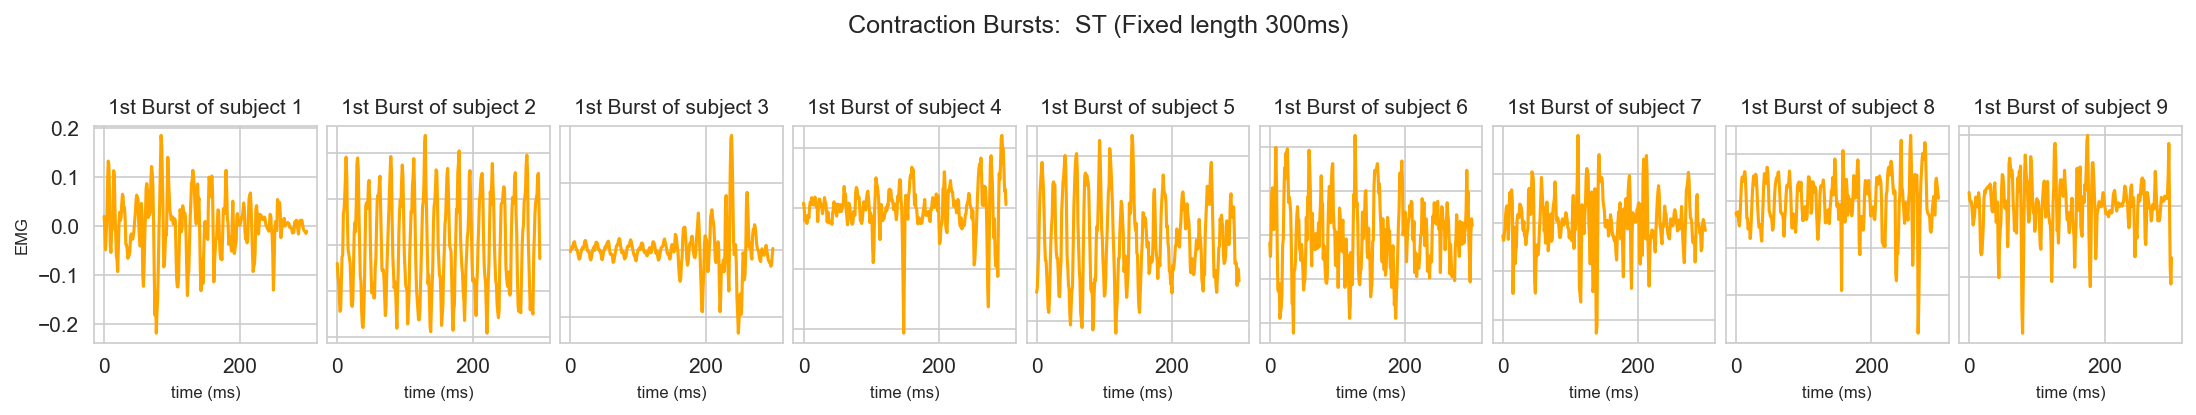

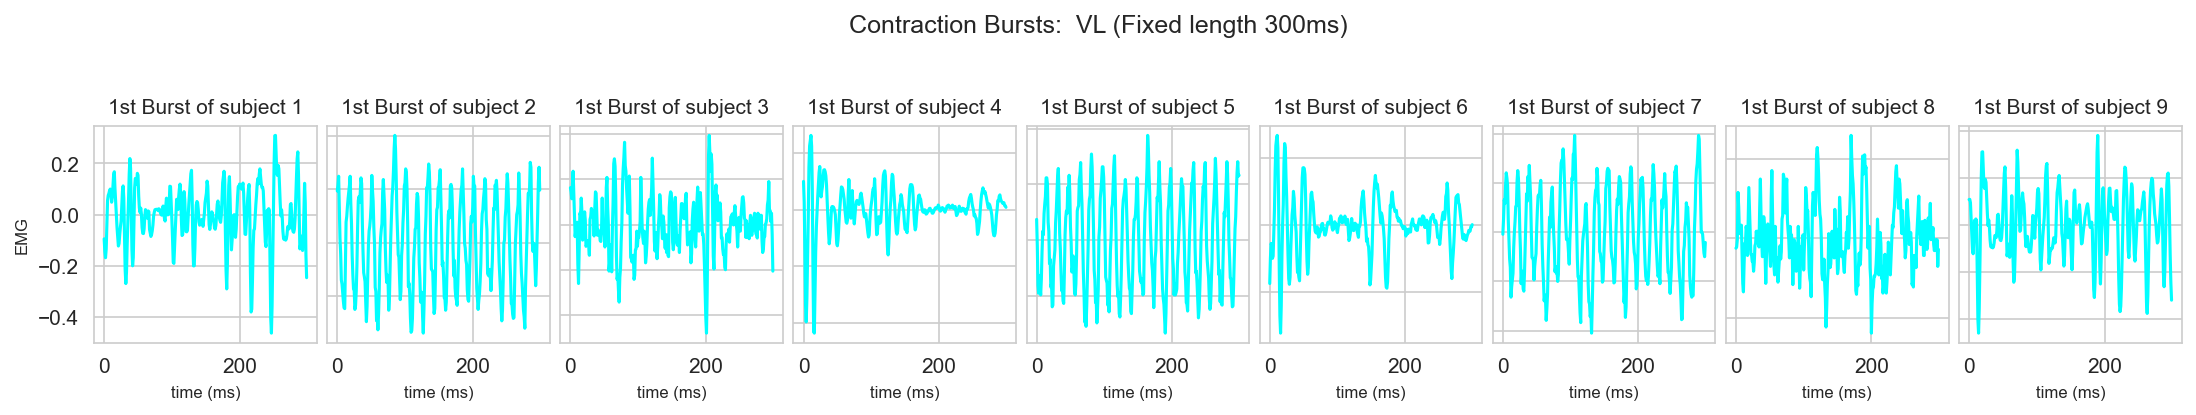

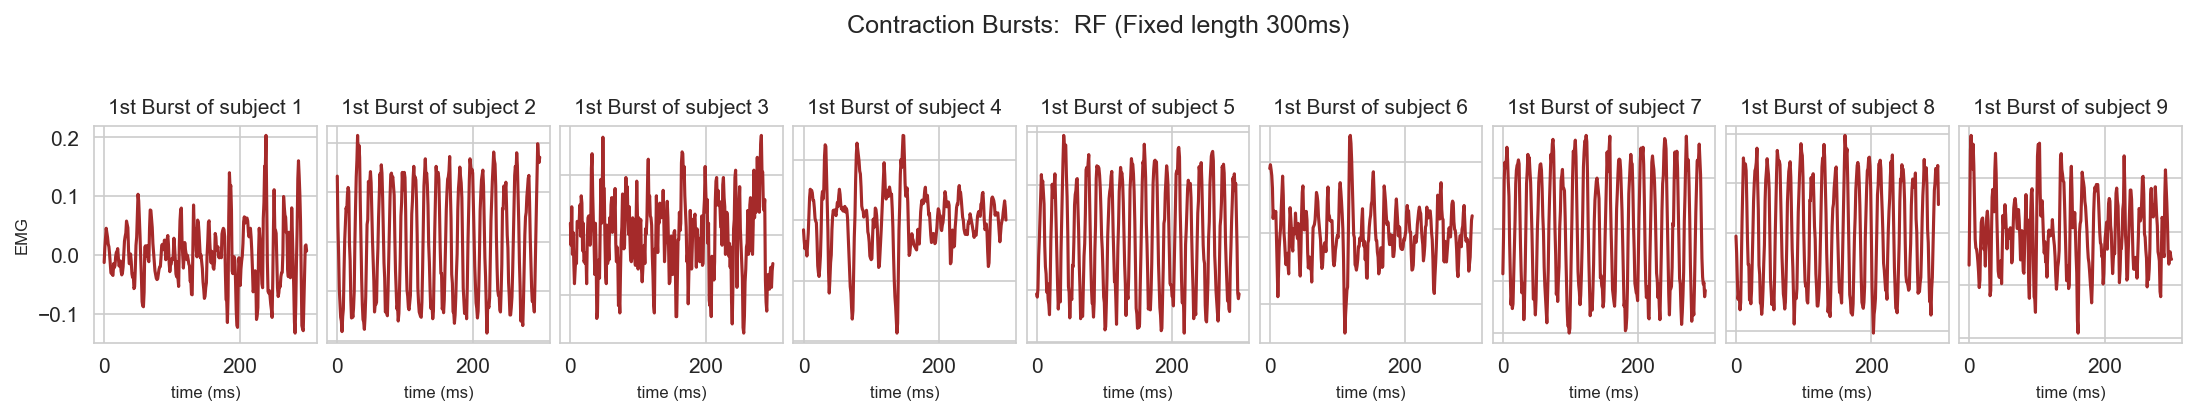

In [93]:
# quick plot to see individual contraction bursts
def plot_independent_bursts(label, burst_list, color):
    n_cols = len(burst_list)  # number of subjects
    fig, axs = plt.subplots(1, n_cols, figsize=(15, 3), dpi=150)  # Adjusted figure size
    fig.subplots_adjust(top=0.85)  # Adjust top spacing
    fig.suptitle(f'Contraction Bursts: {label} (300ms Fixed Length)', y=0.95)  # Adjust title position

    for j in range(n_cols):
        axs[j].plot(burst_list[j][0], color=color)  # Assuming you want the first burst
        axs[j].set_title(f'1st Burst of subject {j+1}', fontsize=10)
        axs[j].set_xlabel('time (ms)', fontsize=8)
        axs[j].set_ylabel('EMG', fontsize=8)
        axs[j].label_outer()  # Hide x labels and tick labels for top plots and y ticks for right plots.

    plt.tight_layout(pad=2.0, w_pad=0.5)  # Dynamically adjust layout
    plt.show()

plot_independent_bursts("TA", fixed_bursts_TA, "cornflowerblue")
plot_independent_bursts("MG", fixed_bursts_MG, "orange")
plot_independent_bursts("SOL",fixed_bursts_SOL,"red")
plot_independent_bursts("BF", fixed_bursts_BF, "green")
plot_independent_bursts("ST", fixed_bursts_ST, "orange")
plot_independent_bursts("VL", fixed_bursts_VL, "cyan")
plot_independent_bursts("RF", fixed_bursts_RF, "brown")

# Hybrid CNN-LSTM Model Implementation

In [99]:
# Parameters
conv1D_1 = [32,5,1]  # number_filters,kernel_size and strides 
pool1D_1 = [2,2]     # pool_size and strides
conv1D_2 = [64,7,1]  # number_filters,kernel_size and strides
pool1D_2 = [2,2]     # pool_size and strides
dense_1 = 50         # nodes ->50
dense_2 = 0          # nodes -> 0
lstm_1 = 30          # lstm blocks ->30
dense_3 = 15         # nodes ->15

# Definition
model1 = Sequential()
model1.add(InputLayer((window,1))) #InputLayer(BURST_WINDOW, N_CHANNELS)

# CNN LAYER 1 (Conv1D + BatchNorm + LeakyReLU + MaxPooling + Dropout)
model1.add(Conv1D(filters=conv1D_1[0],kernel_size=conv1D_1[1], # TODO TRY WITH HIGHER KERNEL SIZE (ODD NUMBER!)
                  strides=conv1D_1[2],padding='same',
                  name='cnn_layer_1'))
# model1.add(BatchNormalization())
model1.add(LeakyReLU(negative_slope=0.1))
model1.add(MaxPooling1D(pool_size=pool1D_1[0], strides=pool1D_1[1], padding='same'))
model1.add(Dropout(0.3))

# CNN LAYER 2 (Conv1D + BatchNorm + LeakyReLU + MaxPooling + Dropout)
model1.add(Conv1D(filters=conv1D_2[0], kernel_size=conv1D_2[1], strides=conv1D_2[2],
                  padding='same', name='cnn_layer_2'))
# model1.add(BatchNormalization())
model1.add(LeakyReLU(negative_slope=0.1))
model1.add(MaxPooling1D(pool_size=pool1D_2[0], strides=pool1D_2[1], padding='same'))
model1.add(Dropout(0.3))

# Dense 1
model1.add(Dense(dense_1))
model1.add(LeakyReLU(negative_slope=0.1))
model1.add(Dropout(0.3))

# LSTM LAYER 1 + Dropout
model1.add(LSTM(lstm_1, dropout=0.3))

# Dense 2
model1.add(Dense(dense_3)) # We convert to Relu after LSTM blocks
model1.add(LeakyReLU(negative_slope=0.1))
model1.add(Dropout(0.3))

# Softmax
model1.add(Dense(7, 'softmax')) # Softmax
model1.summary()

# Loading Pretrained Weights
# model1.load_weights('w_cnn1.h5', by_name=True, skip_mismatch=False, options=None)
# model1.load_weights('w_cnn2.h5', by_name=True, skip_mismatch=False, options=None)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cnn_layer_1 (Conv1D)            │ (None, 300, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_layer_2 (Conv1D)            │ (None, 150, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 150, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75, 50)         │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 75, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,139 (109.92 KB)

 Trainable params: 28,139 (109.92 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
cp = ModelCheckpoint('model1/best_model_epoch_{epoch:02d}_val_acc_{val_accuracy:.4f}.keras', save_best_only = True, monitor='val_accuracy', mode='max')
lr = 0.001
model1.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=lr), metrics=['accuracy']) # TODO: Try DK (Learning rate)

In [101]:
# with tf.device('/gpu:0'):
history = model1.fit(train_dataset, validation_data=valid_dataset, epochs=200, callbacks=[cp])
# Retrieve minimum loss and best accuracy
min_val_categ_crossentropy = round(min(history.history['val_loss']),14)
best_val_accuracy = round(max(history.history['val_accuracy']),3)*100
# save_pickle(history, history_name+'.pkl')
history_name = f'histories/history(val_acc={best_val_accuracy}%,val_categ_crossentropy={min_val_categ_crossentropy})_lr[{lr}]_conv1{conv1D_1}_pool1{pool1D_1}_conv2{conv1D_2}_pool2{pool1D_2}_dense1[{dense_1}]_dense2[{dense_2}]_lstm[{lstm_1}]_dense3[{dense_3}]'
np.save(history_name + '.npy',history.history)
# NOTE: The warnings you will see in the training are not relevant (it's due to the fact that the model is being saved so to be able to call it back in the future)
print(f'History (loss and accuracy) for training and validation saved in:\n-> {history_name}')

Epoch 1/200
     24/Unknown 13s 351ms/step - accuracy: 0.1776 - loss: 1.9386

C:\Users\firas\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.1780 - loss: 1.9353 - val_accuracy: 0.2018 - val_loss: 1.6407
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.1912 - loss: 1.9132 - val_accuracy: 0.2012 - val_loss: 1.6088
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 481ms/step - accuracy: 0.1966 - loss: 1.8838 - val_accuracy: 0.2002 - val_loss: 1.5837
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.1961 - loss: 1.8650 - val_accuracy: 0.2371 - val_loss: 1.5619
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.2206 - loss: 1.8436 - val_accuracy: 0.2602 - val_loss: 1.5451
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.2304 - loss: 1.8253 - val_accuracy: 0.2612 - val_loss: 1.5299
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.2395 - loss: 1.8107 - val_accuracy: 0.2761 - val_loss: 1.5139
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.2590 - loss: 1.7809 - val_accuracy

## Plotting Loss and Accuracy Metrics over Epochs

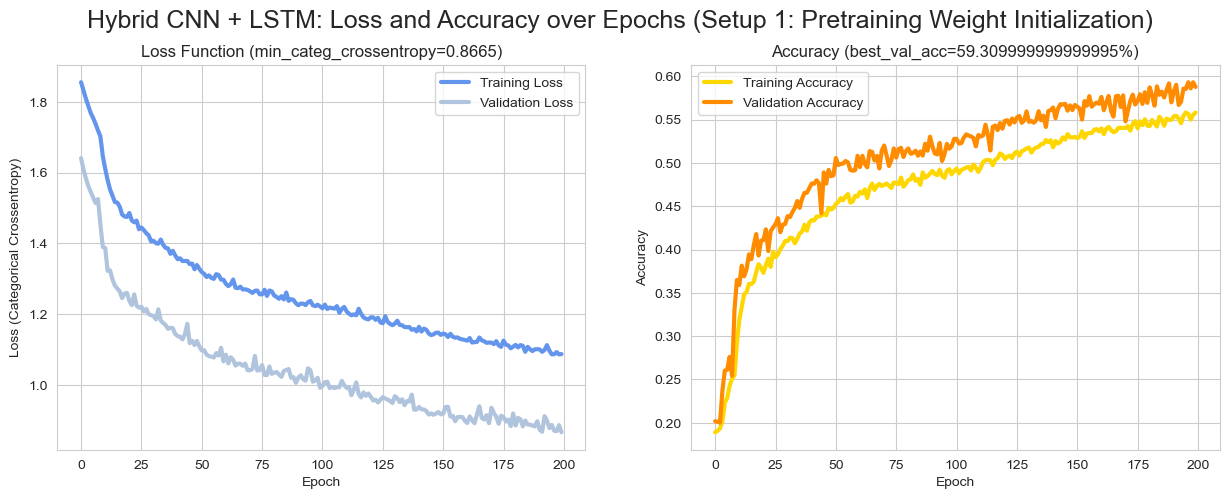

<Figure size 640x480 with 0 Axes>

In [102]:
h = np.load(history_name+'.npy',allow_pickle=True).item()

min_val_categ_crossentropy = round(min(h['val_loss']),4)
best_val_accuracy = round(max(h['val_accuracy']),4)*100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Hybrid CNN + LSTM: Loss and Accuracy over Epochs (Setup 1: Pretraining Weight Initialization)', fontsize=18, y=0.99)
ax1.set_title(f'Loss Function (min_categ_crossentropy={min_val_categ_crossentropy})')
ax2.set_title(f'Accuracy (best_val_acc={best_val_accuracy}%)')
ax1.set(xlabel='Epoch', ylabel='Loss (Categorical Crossentropy)')
ax2.set(xlabel='Epoch', ylabel='Accuracy')
ax1.plot(h['loss'], color = "cornflowerblue",linewidth=3)
ax1.plot(h['val_loss'], color = "lightsteelblue",linewidth=3)
ax1.legend(['Training Loss', 'Validation Loss'])
ax2.plot(h['accuracy'], color = "gold",linewidth=3)
ax2.plot(h['val_accuracy'], color = "darkorange",linewidth=3)
ax2.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()
plt.savefig(history_name+'.png')

model_name = f'results/NO_WEIGHTS-Hybrid_CNN-LSTM(val_acc={best_val_accuracy}%,val_categ_crossentropy={min_val_categ_crossentropy})_lr[{lr}]_conv1{conv1D_1}_pool1{pool1D_1}_conv2{conv1D_2}_pool2{pool1D_2}_dense1[{dense_1}]_dense2[{dense_2}]_lstm[{lstm_1}]_dense3[{dense_3}]'
plt.savefig(model_name+'.png')

## Serializing Datasets (train and val)

In [103]:
X_train = [] ; y_train = []
X_val = [] ; y_val = []
X_loo = [] ; y_loo = []

for feature, label in train_dataset:
    for i in range(label.shape[0]):
        X_train.append(feature[i])
        y_train.append(label[i])
for feature, label in valid_dataset:
    for i in range(label.shape[0]):
        X_val.append(feature[i])
        y_val.append(label[i])
for feature, label in loo_dataset:
    for i in range(label.shape[0]):
        X_loo.append(feature[i])
        y_loo.append(label[i])

X_train = np.array(X_train) ; y_train = np.array(y_train)
X_val = np.array(X_val) ; y_val = np.array(y_val)
X_loo = np.array(X_loo) ; y_loo = np.array(y_loo)

## Metric Functions: Confusion Matrix, Precision, Recall and F-1Score

In [104]:
# Find the filename of the best model saved during training
best_model_filename = max(glob.glob('model1/best_model_epoch_*_val_acc_*.keras'), key=os.path.getctime)
# Load the best model
best_model = load_model(best_model_filename)


def plot_confusion_matrix(X,y,color,title):
    predictions_hot = best_model.predict(X)
    predictions = np.argmax(predictions_hot, axis=1)
    np.set_printoptions(suppress=True)
    print("Some y Predicted\t", predictions[:30])
    y_list = np.argmax(y, axis=1)
    print("Some y Label\t\t", y_list[:30])

    cm = confusion_matrix(y_list, predictions)
    plt.figure(figsize = (15,10))
    ax = sn.heatmap(cm, annot=True, cmap=color, fmt='d')
    ax.set_title(title+'\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF'])
    ax.yaxis.set_ticklabels(['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF'])


    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.show()

    np.set_printoptions(precision=3)
    precision, recall, f1, _ = score(np.argmax(y, axis=1), np.argmax(predictions_hot, axis=1))
    f1_micro = f1_score(np.argmax(y, axis=1), np.argmax(predictions_hot, axis=1), average='micro')

    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'fscore: {f1}')
    print(f'fscore_micro: {f1_micro}')

## Confusion Matrix in Training

757/757 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Some y Predicted	 [4 1 3 3 5 0 4 6 4 2 2 5 1 5 1 0 1 0 3 3 2 1 4 3 3 5 4 4 4 1]
Some y Label		 [5 1 0 3 5 0 4 6 2 2 2 5 1 6 1 0 1 0 3 0 3 1 1 0 0 5 5 2 4 2]


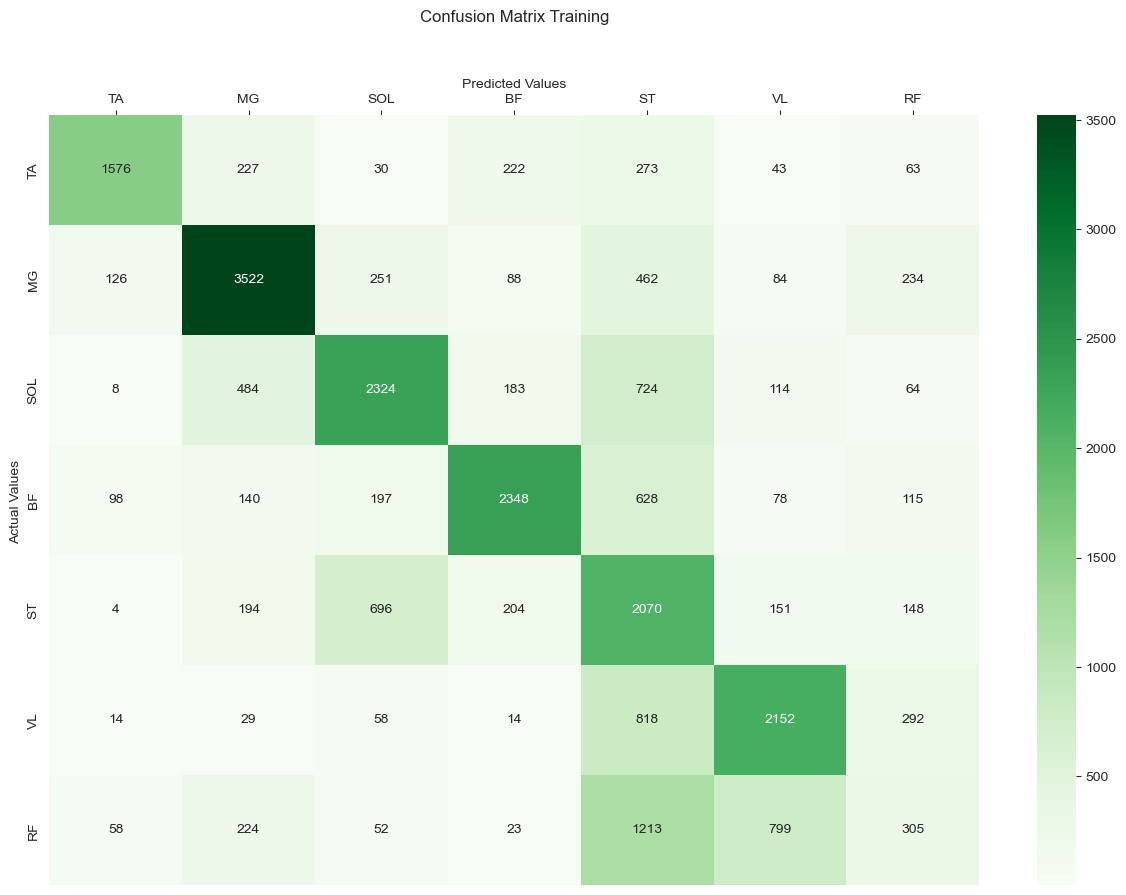

precision: [0.837 0.731 0.644 0.762 0.335 0.629 0.25 ]
recall: [0.647 0.739 0.596 0.651 0.597 0.637 0.114]
fscore: [0.73  0.735 0.619 0.702 0.429 0.633 0.157]
fscore_micro: 0.5901998018494056


In [105]:
plot_confusion_matrix(X_train, y_train, 'Greens', 'Confusion Matrix Training')

## Confusion Matrix in Testing

190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Some y Predicted	 [5 1 4 3 1 5 5 5 3 5 4 3 0 4 3 3 4 1 5 1 4 0 2 3 4 6 4 3 1 6]
Some y Label		 [5 4 6 0 2 4 2 5 3 5 4 3 0 1 3 3 4 1 6 1 2 0 2 3 4 6 4 3 1 0]


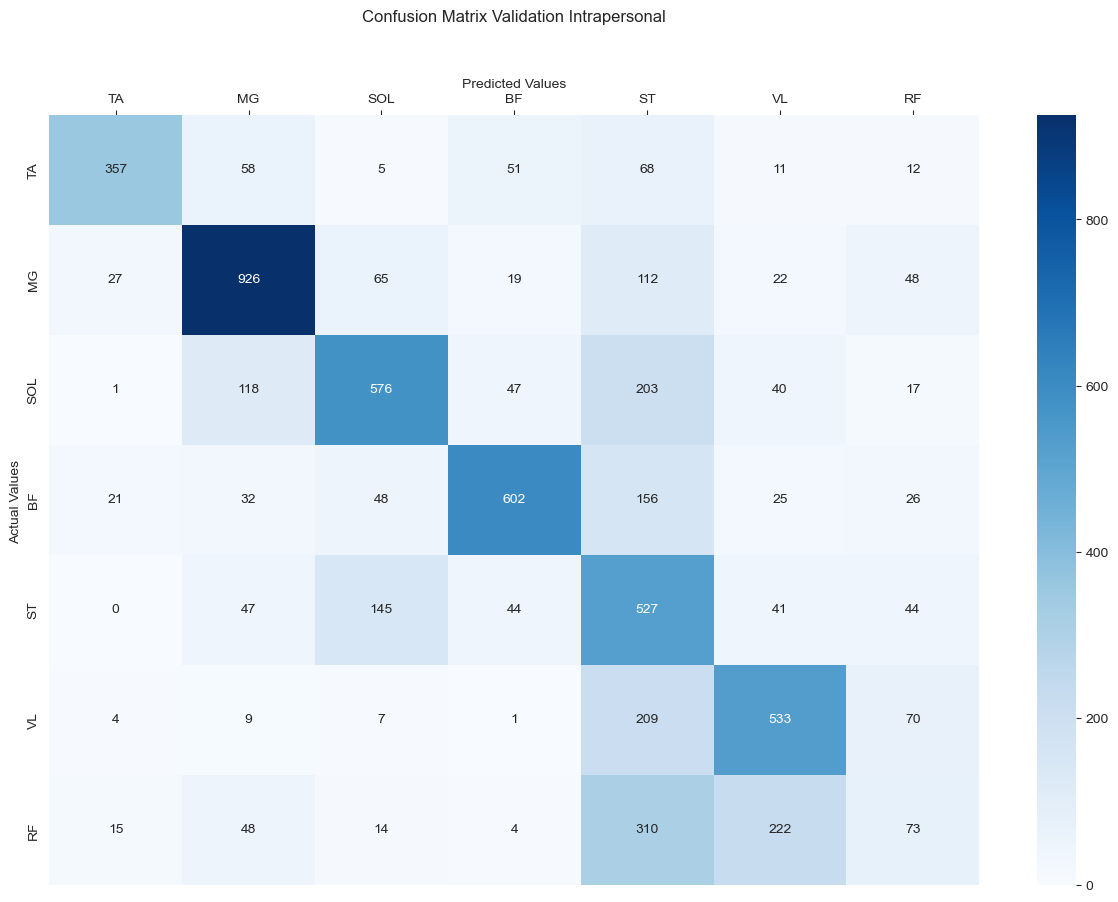

precision: [0.84  0.748 0.67  0.784 0.332 0.596 0.252]
recall: [0.635 0.76  0.575 0.662 0.621 0.64  0.106]
fscore: [0.723 0.754 0.619 0.718 0.433 0.617 0.15 ]
fscore_micro: 0.593069306930693


In [106]:
plot_confusion_matrix(X_val, y_val, 'Blues', 'Confusion Matrix Validation Intrapersonal')

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Some y Predicted	 [4 2 4 2 4 2 4 1 1 0 5 0 0 2 0 4 2 2 2 2 4 4 4 3 3 2 4 5 2 3]
Some y Label		 [3 2 3 4 3 2 5 5 0 0 6 1 1 2 1 3 2 2 4 3 6 5 5 6 4 4 3 5 5 6]


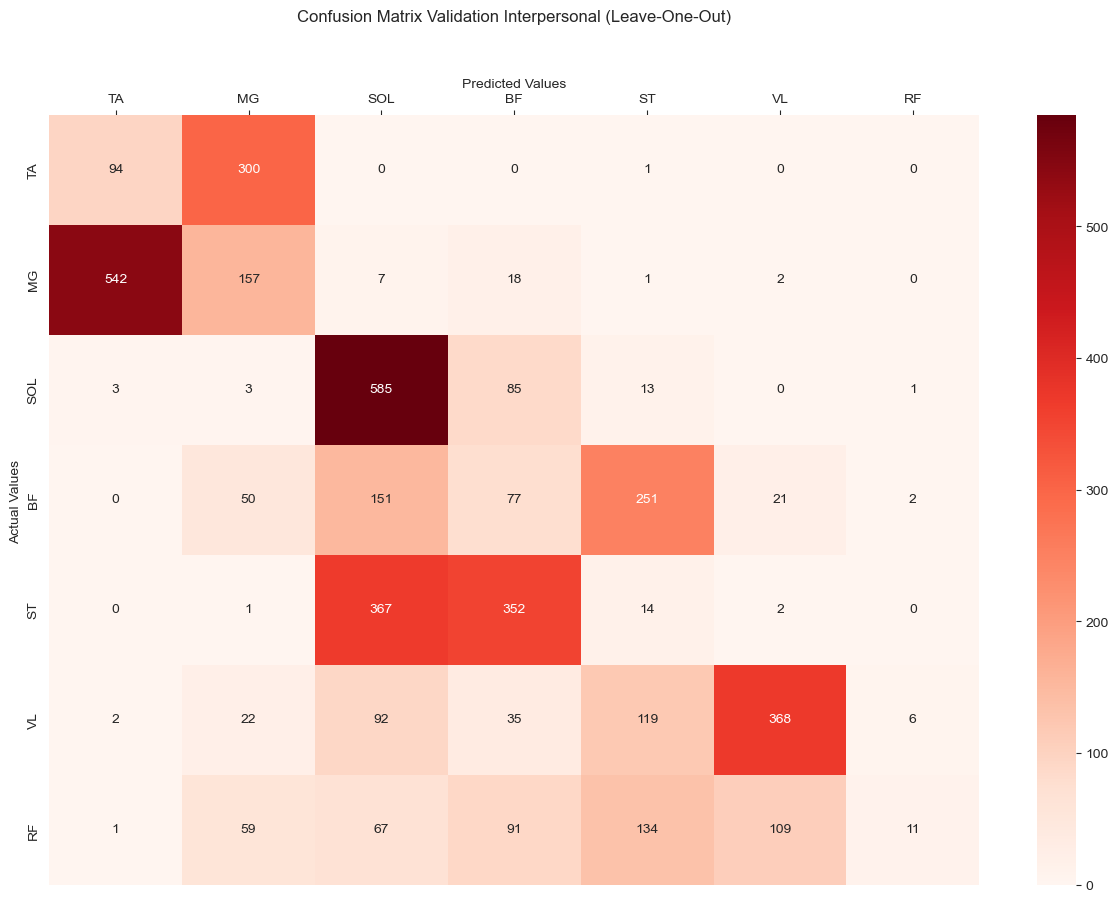

precision: [0.146 0.265 0.461 0.117 0.026 0.733 0.55 ]
recall: [0.238 0.216 0.848 0.139 0.019 0.571 0.023]
fscore: [0.181 0.238 0.597 0.127 0.022 0.642 0.045]
fscore_micro: 0.30977229601518025


In [129]:
plot_confusion_matrix(X_loo, y_loo, 'Reds', 'Confusion Matrix Validation Interpersonal (Leave-One-Out)')